In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# Dataset Information

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

VARIABLES|TYPE|DESCRIPTION
---------|----|-----------
ID       |UID |A unique ID to identify a candidate
Salary |Continuous |Annual CTC oﬀered to the candidate (in INR)
DOJ |Date |Date of joining the company
DOL |Date |Date of leaving the company
Designation |Categorical |Designation oﬀered in the job
JobCity |Categorical |Location of the job (city)
Gender |Categorical |Candidate’s gender
DOB |Date |Date of birth of candidate
10percentage |Continuous |Overall marks obtained in grade 10 examinations
10board |Continuous |The school board whose curriculum the candidate followed in grade 10
12graduation |Date |Year of graduation - senior year high school
12percentage |Continuous |Overall marks obtained in grade 12 examinations
12board |Date |The school board whose curriculum the candidate followed in grade 12
CollegeID |NA/ID |Unique ID identifying the college which the candidate attended
CollegeTier |Categorical |Tier of college
Degree |Categorical |Degree obtained/pursued by the candidate
Specialization |Categorical |Specialization pursued by the candidate
CollegeGPA |Continuous |Aggregate GPA at graduation
CollegeCityID |NA/ID |A unique ID to identify the city in which the college is located in
CollegeCityTier |Categorical |The tier of the city in which the college is located
CollegeState |Categorical |Name of States
GraduationYear |Date |Year of graduation (Bachelor’s degree)
English |Continuous |Scores in AMCAT English section
Logical |Continuous |Scores in AMCAT Logical section
Quant |Continuous |Scores in AMCAT Quantitative section
Domain |Continuous/ Standardized |Scores in AMCAT’s domain module
ComputerProgramming |Continuous |Score in AMCAT’s Computer programming section
ElectronicsAndSemicon |Continuous |Score in AMCAT’s Electronics & Semiconductor Engineering section
ComputerScience |Continuous |Score in AMCAT’s Computer Science section
MechanicalEngg |Continuous |Score in AMCAT’s Mechanical Engineering section
ElectricalEngg |Continuous |Score in AMCAT’s Electrical Engineering section
TelecomEngg |Continuous |Score in AMCAT’s Telecommunication Engineering section
CivilEngg |Continuous |Score in AMCAT’s Civil Engineering section
conscientiousness |Continuous/ Standardized |Scores in one of the sections of AMCAT’s personality test
agreeableness |Continuous/Standardized |Scores in one of the sections of AMCAT’s personality test
extraversion |Continuous/ Standardized |Scores in one of the sections of AMCAT’s personality test
neuroticism |Continuous/Standardized |Scores in one of the sections of AMCAT’s personality test
openess_to_experience |Continuous/Standardized |Scores in one of the sections of AMCAT’s personality test



































In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [5]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.shape

(3998, 38)

In [7]:
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [8]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [10]:
df = df.set_index('ID')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,3998.0,2012.105803,31.857271,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03


# Univariate Analysis

C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

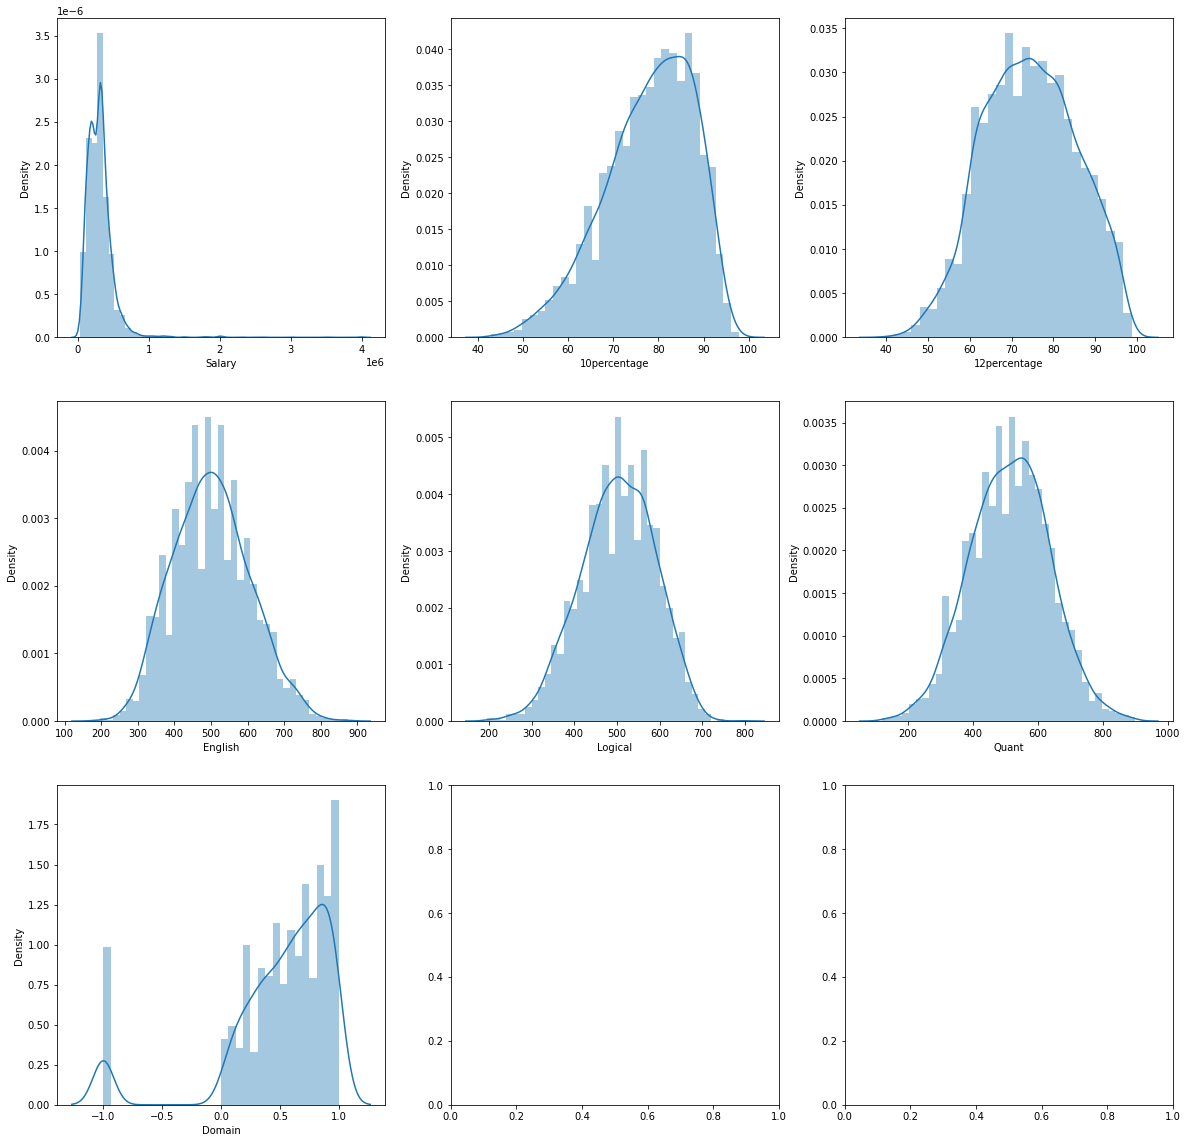

In [12]:
# Displaying multiple distplots using subplot function. 
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))
sns.distplot( df["Salary"] , ax=axes[0, 0])
sns.distplot( df["10percentage"] ,  ax=axes[0, 1])
sns.distplot( df["12percentage"] , ax=axes[0, 2])
sns.distplot( df["English"], ax=axes[1, 0] )
sns.distplot( df["Logical"] , ax=axes[1, 1] )
sns.distplot( df["Quant"] , ax=axes[1, 2] )
sns.distplot( df["Domain"] , ax=axes[2, 0])
plt.show()

* From above graph we can observe there is a outlier, Salary >10,00,000 is very rare, especially in the first job.
*The 10percentage column is not normally distributed and is Right Skewed and the max is in range 80-90.
*The 12percentage column is not normally distributed and outliers and the max is in range 70-80.
*The English column is normally distributed and has max in range 400-600.
*The Logical column is normally distributed and has max in range 400-700.
*The Quant column is normally distributed and has max in range 400-800.
*The collegecityid column is not normally distributed and has outliers.

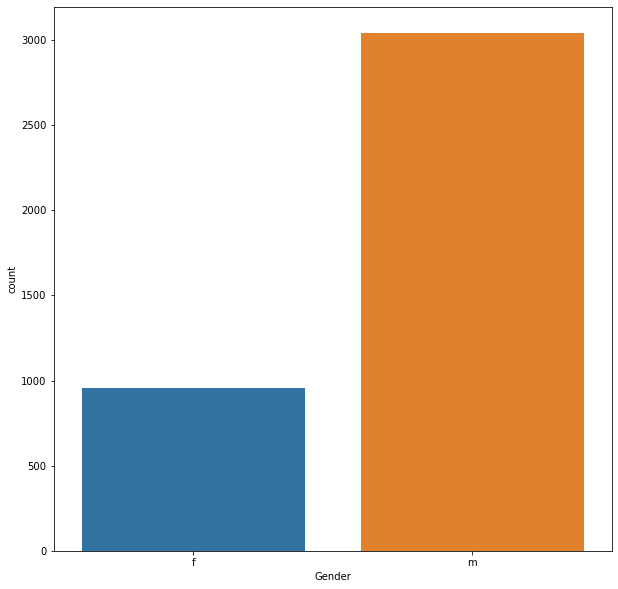

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Gender'])
plt.show()

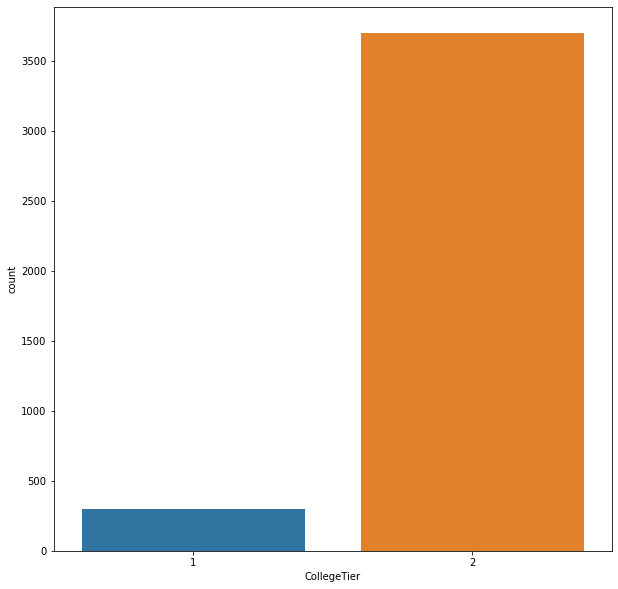

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['CollegeTier'])
plt.show()

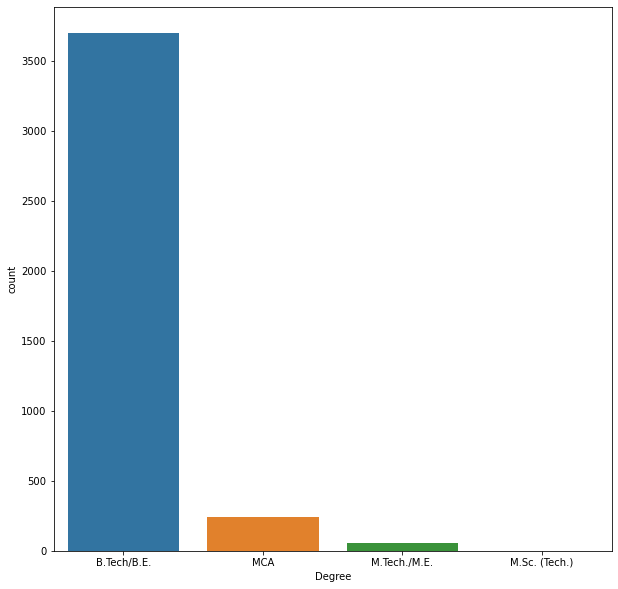

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Degree'])
plt.show()

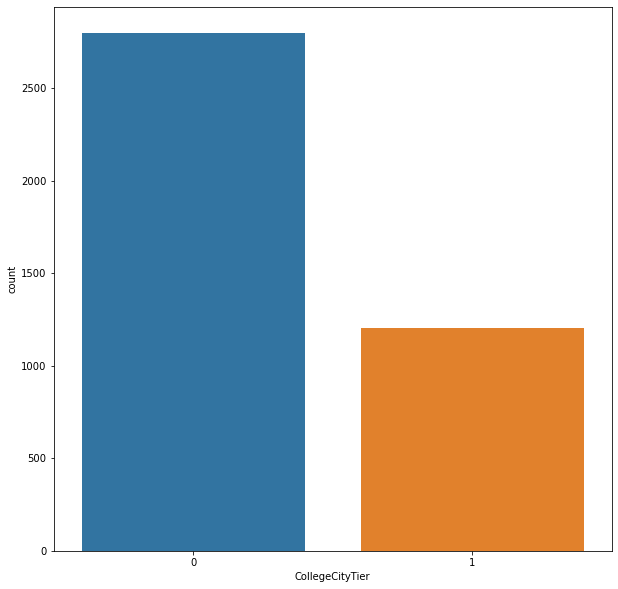

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['CollegeCityTier'])
plt.show()

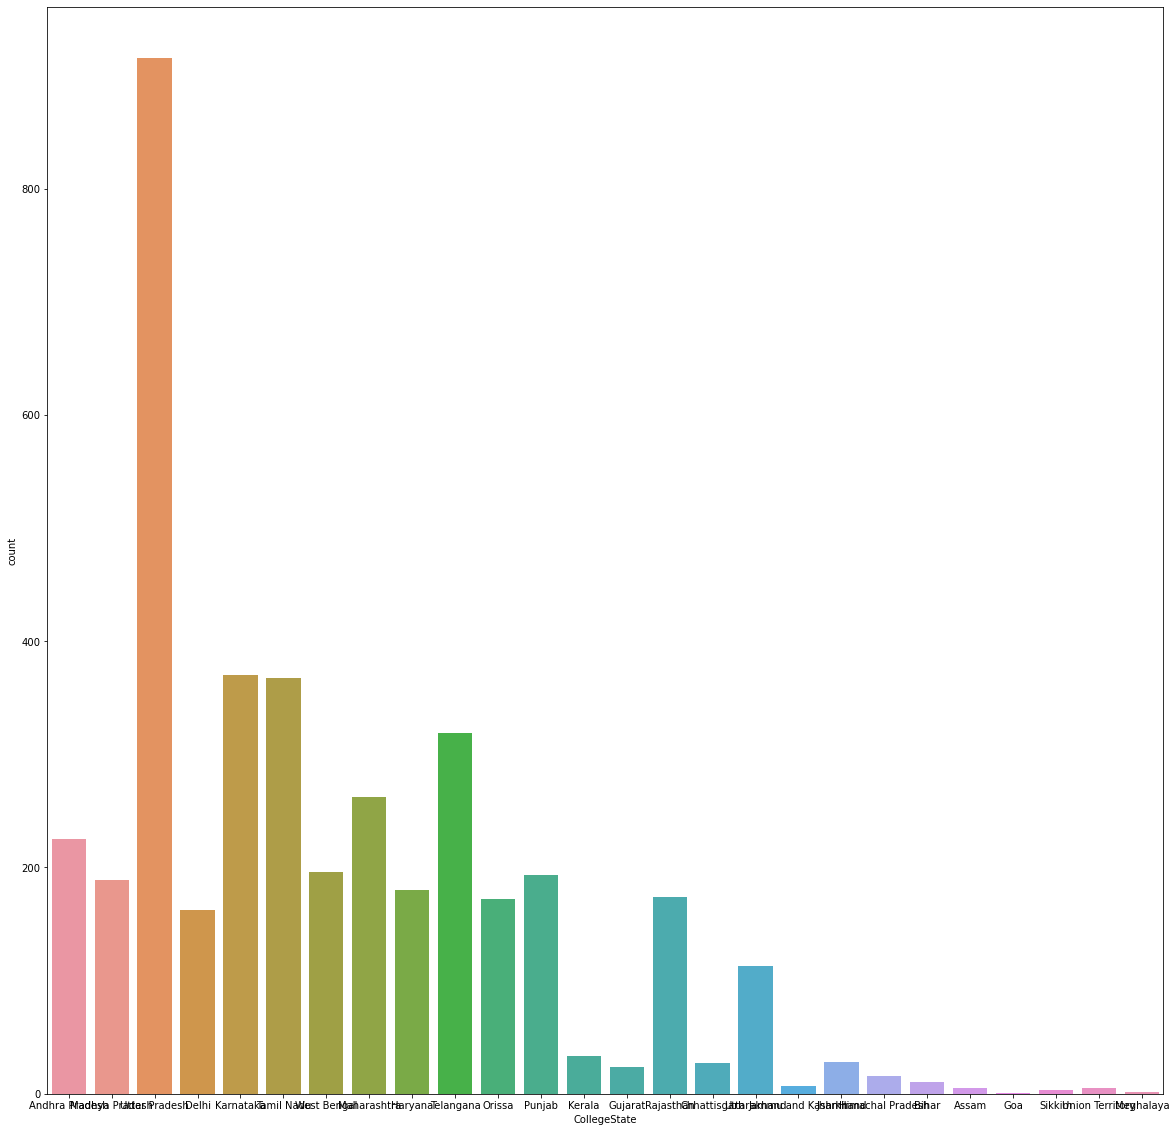

In [17]:
plt.figure(figsize=(20,20))
sns.countplot(x=df['CollegeState'])
plt.show()

<AxesSubplot:>

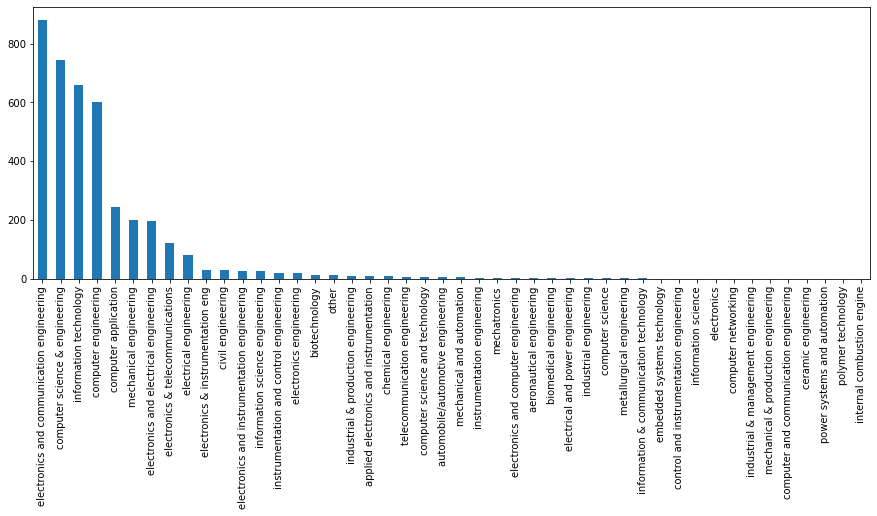

In [18]:
specialization_freq = df['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5))

# Bivariate Analysis

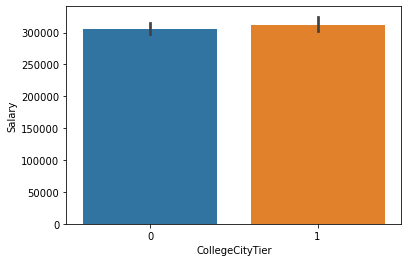

In [19]:
sns.barplot(x='CollegeCityTier',y='Salary',data=df);

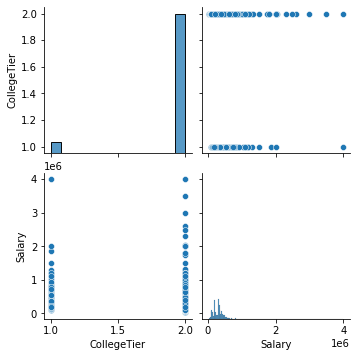

In [20]:
sns.pairplot(df,vars=['CollegeTier', 'Salary']);

* From the graph we observe that collegecitytier 1 has bagged with highest salary , and also to be noted that collegecity tier 0 also provide the same salary expectations

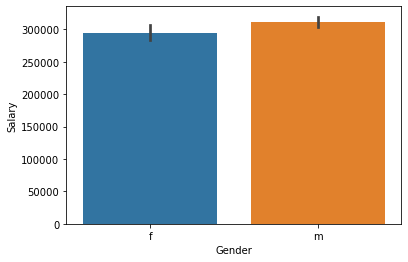

In [21]:
sns.barplot(x='Gender',y='Salary',data=df);

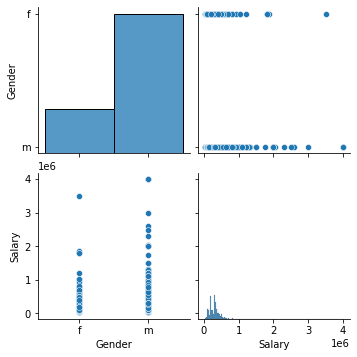

In [22]:
sns.pairplot(df,vars=['Gender', 'Salary']);

* Males and females take the salary more or less the same

In [23]:
l=[]
for i in df['Designation']:
    if ('senior' in i and 'engineer' not in i):
        l.append('senior')
    elif('trainee'in i and 'engineer' not in i):
        l.append('trainee')
    elif('engineer' in i and 'senior' not in i):
        l.append('engineer')
    elif('associate' in i and 'senior' not in i):
        l.append('associate')
    elif('developer' in i and 'senior' not in i):
        l.append('developer')
    elif('manager' in i and 'senior' not in i):
        l.append('manager')
    elif('analyst' in i):
        l.append('analyst')
    elif('consultant' in i):
        l.append('consultant')
    elif('executive' in i):
        l.append('executive')
    elif('designer' in i):
        l.append('designer')
    else:
        l.append('others')

In [24]:
df['Designations']=l
df['Designations'].value_counts()

engineer      1997
developer      668
others         538
analyst        402
manager        123
associate       66
executive       62
trainee         57
senior          43
designer        23
consultant      19
Name: Designations, dtype: int64

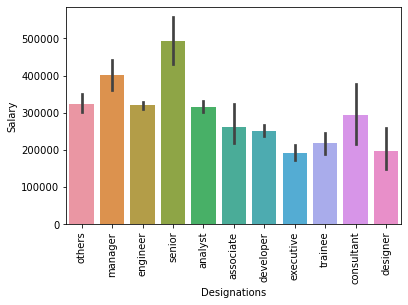

In [25]:
sns.barplot(x='Designations',y='Salary',data=df)
plt.xticks(rotation=90);

# HeatMap

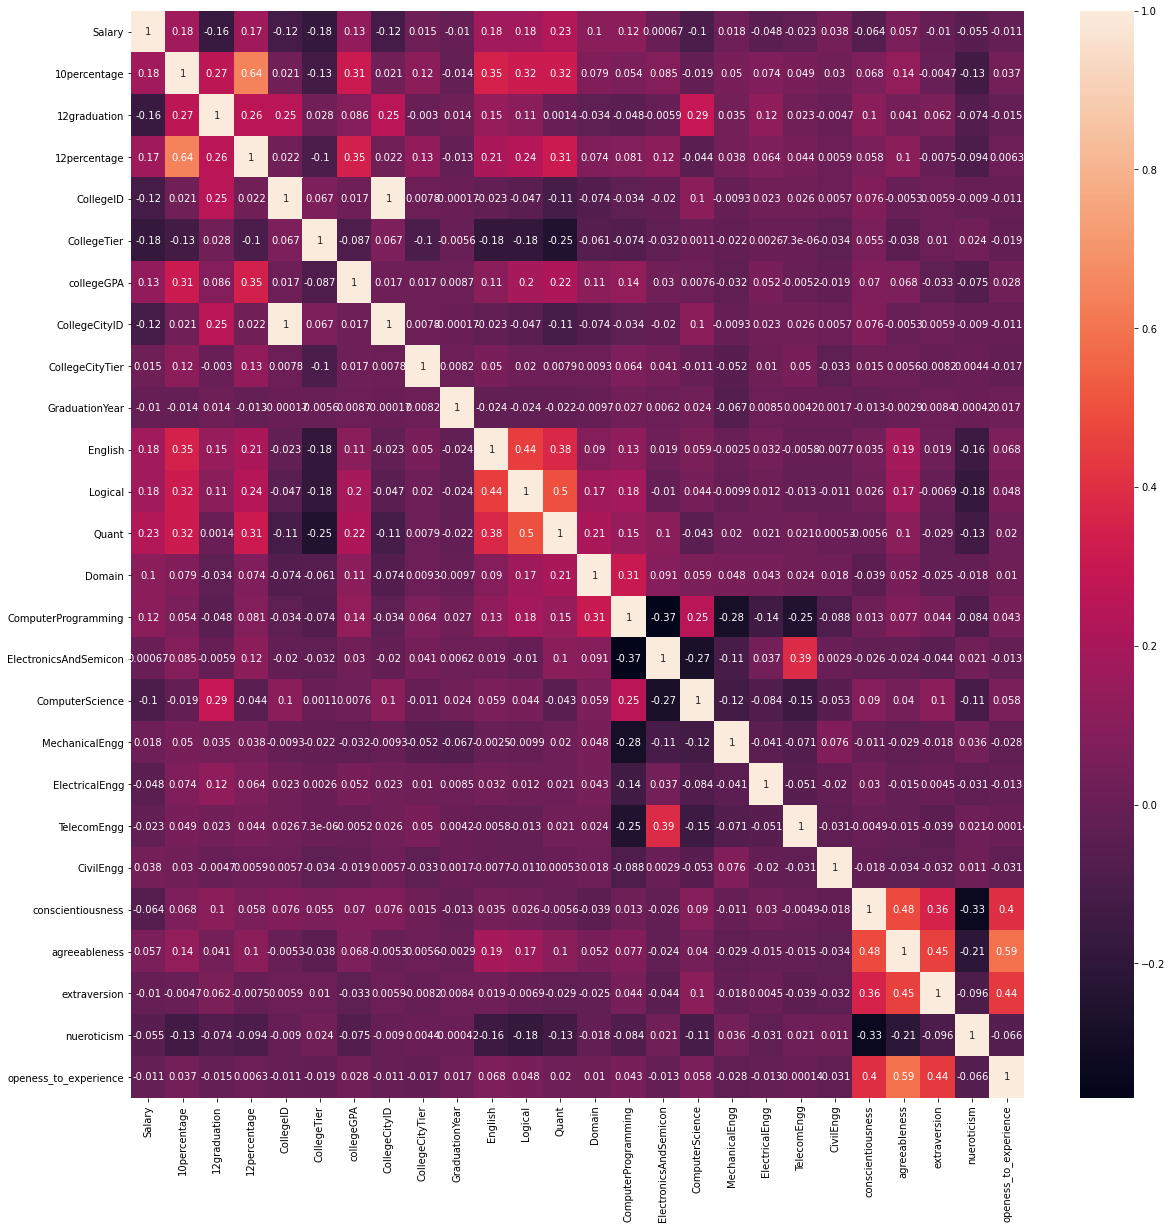

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

## Research Questions
##### 1) Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [27]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [28]:
 df['Designations'].unique()

array(['others', 'manager', 'engineer', 'senior', 'analyst', 'associate',
       'developer', 'executive', 'trainee', 'consultant', 'designer'],
      dtype=object)

In [29]:

df['DOL']=df['DOL'].str.replace('present','01-12-2015 00:00')

df['DOL'] = pd.to_datetime(df['DOL'])
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['Experience']=((df['DOL']-df['DOJ']).map(lambda x: round(x.days/365,1)))

In [30]:
df1 = df[['Designations','Specialization','Salary','Experience']]

In [31]:
df1.shape

(3998, 4)

In [32]:
df1.nunique()

Designations       11
Specialization     46
Salary            177
Experience         60
dtype: int64

<Figure size 3600x3600 with 0 Axes>

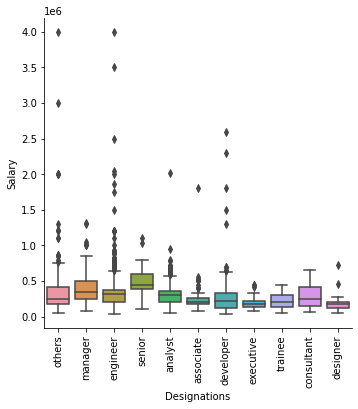

In [33]:
plt.figure(figsize=(50, 50))

sns.catplot(x='Designations', y="Salary", kind="box", data=df1)
plt.xticks(rotation=90);

In [34]:
df2 = df1.loc[df1['Specialization'] == 'computer engineering']

In [35]:
list=['engineer','analyst','associate']
df3=df2.loc[df2['Designations'].isin(list)]

In [36]:
df3.isnull()

,Designations,Specialization,Salary,Experience
ID,,,,
466888,False,False,False,False
140069,False,False,False,True
192703,False,False,False,False
602377,False,False,False,False
247617,False,False,False,True
...,...,...,...,...
469012,False,False,False,True
212055,False,False,False,True
305041,False,False,False,False


In [37]:
df3.dropna(subset = ["Experience"], inplace=True)

<ipython-input-37-b79d3789e61c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(subset = ["Experience"], inplace=True)


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 466888 to 355888
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Designations    168 non-null    object 
 1   Specialization  168 non-null    object 
 2   Salary          168 non-null    int64  
 3   Experience      168 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.6+ KB


In [39]:
df3['Experience'].unique()

array([ 0.4,  3.1,  1.9,  2.6,  2.3,  1.4,  2.8,  1.8,  0.9,  3.9,  0. ,
        4. ,  1.5,  4.5,  3.3,  3. ,  2.5,  2.9,  2.4,  2.2, -0.1,  1.1,
        0.6,  2.1,  1.6,  2. ,  3.5,  3.2,  1.3,  1. ,  3.8,  0.5,  3.7,
        2.7,  0.8, 23.6,  3.4,  1.7,  4.4,  1.2,  4.1])

* For convienince let fresher's experience taken has less than 1.0 years 

In [40]:
df4 = df3.loc[df3['Experience'] <= 1.0]

In [41]:
df4.describe()

,Salary,Experience
count,25.000000,25.000000
mean,296600.000000,0.576000
std,108720.973138,0.319218
min,50000.000000,-0.100000
25%,220000.000000,0.400000
50%,305000.000000,0.500000
75%,345000.000000,0.900000
max,560000.000000,1.000000


* From the above information we can infer that the fresher who has done computer specialization and opted engineer(s/w or h/w) or analyst or associate have an average salary of 2,96,600 
* With maximum salary of 5.6 lakh to minimum salary of 50k

##### 2)Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)


* Inorder to answer above question, we must use chi square test of independence

In [42]:
df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [43]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [44]:
 #Looking at the freqency distribution

pd.crosstab(df['Specialization'], df['Gender'], margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [45]:
# These are the observed frequencies

observed = pd.crosstab(df['Specialization'], df['Gender'])

observed

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [46]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [47]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [48]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

57.50530474499599

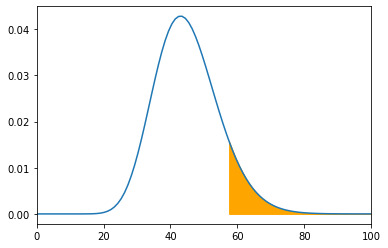

In [49]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='orange')

In [50]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [51]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


**From the above test it rejects null hypothesis and hence we can say both are dependent**

* From the EDA we observe that , the specialization is dependent on the gender
* The fresher who has done CSE and have got into analyst,engineer etc position have an maximum salary of 5.6lakh and minimum of 50k
* With experience the there is a hike in the salary